In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

## Part 1: Setup

* Import the data.
* Create the target variable `y` as a 1/0 column where 1 means red.
* Create a `pairplot` for the dataset.
* Create a bar plot showing the correlations between each column and `y`
* Pick the most 2 correlated fields (using the absolute value of correlations) and create `X`
* Use MinMaxScaler to scale `X`. Note that this will output a np.array. Make it a DataFrame again and rename the columns appropriately.


In [3]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Wine_Quality_Data.csv", sep=',')



In [4]:
data.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [5]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

data["color"] = label_enc.fit_transform(data["color"] )



In [6]:
data['color'] = [x + 1 if x == 0 else x - 1 for x in data['color']]

In [7]:
data["color"].value_counts(normalize=True)

0    0.753886
1    0.246114
Name: color, dtype: float64

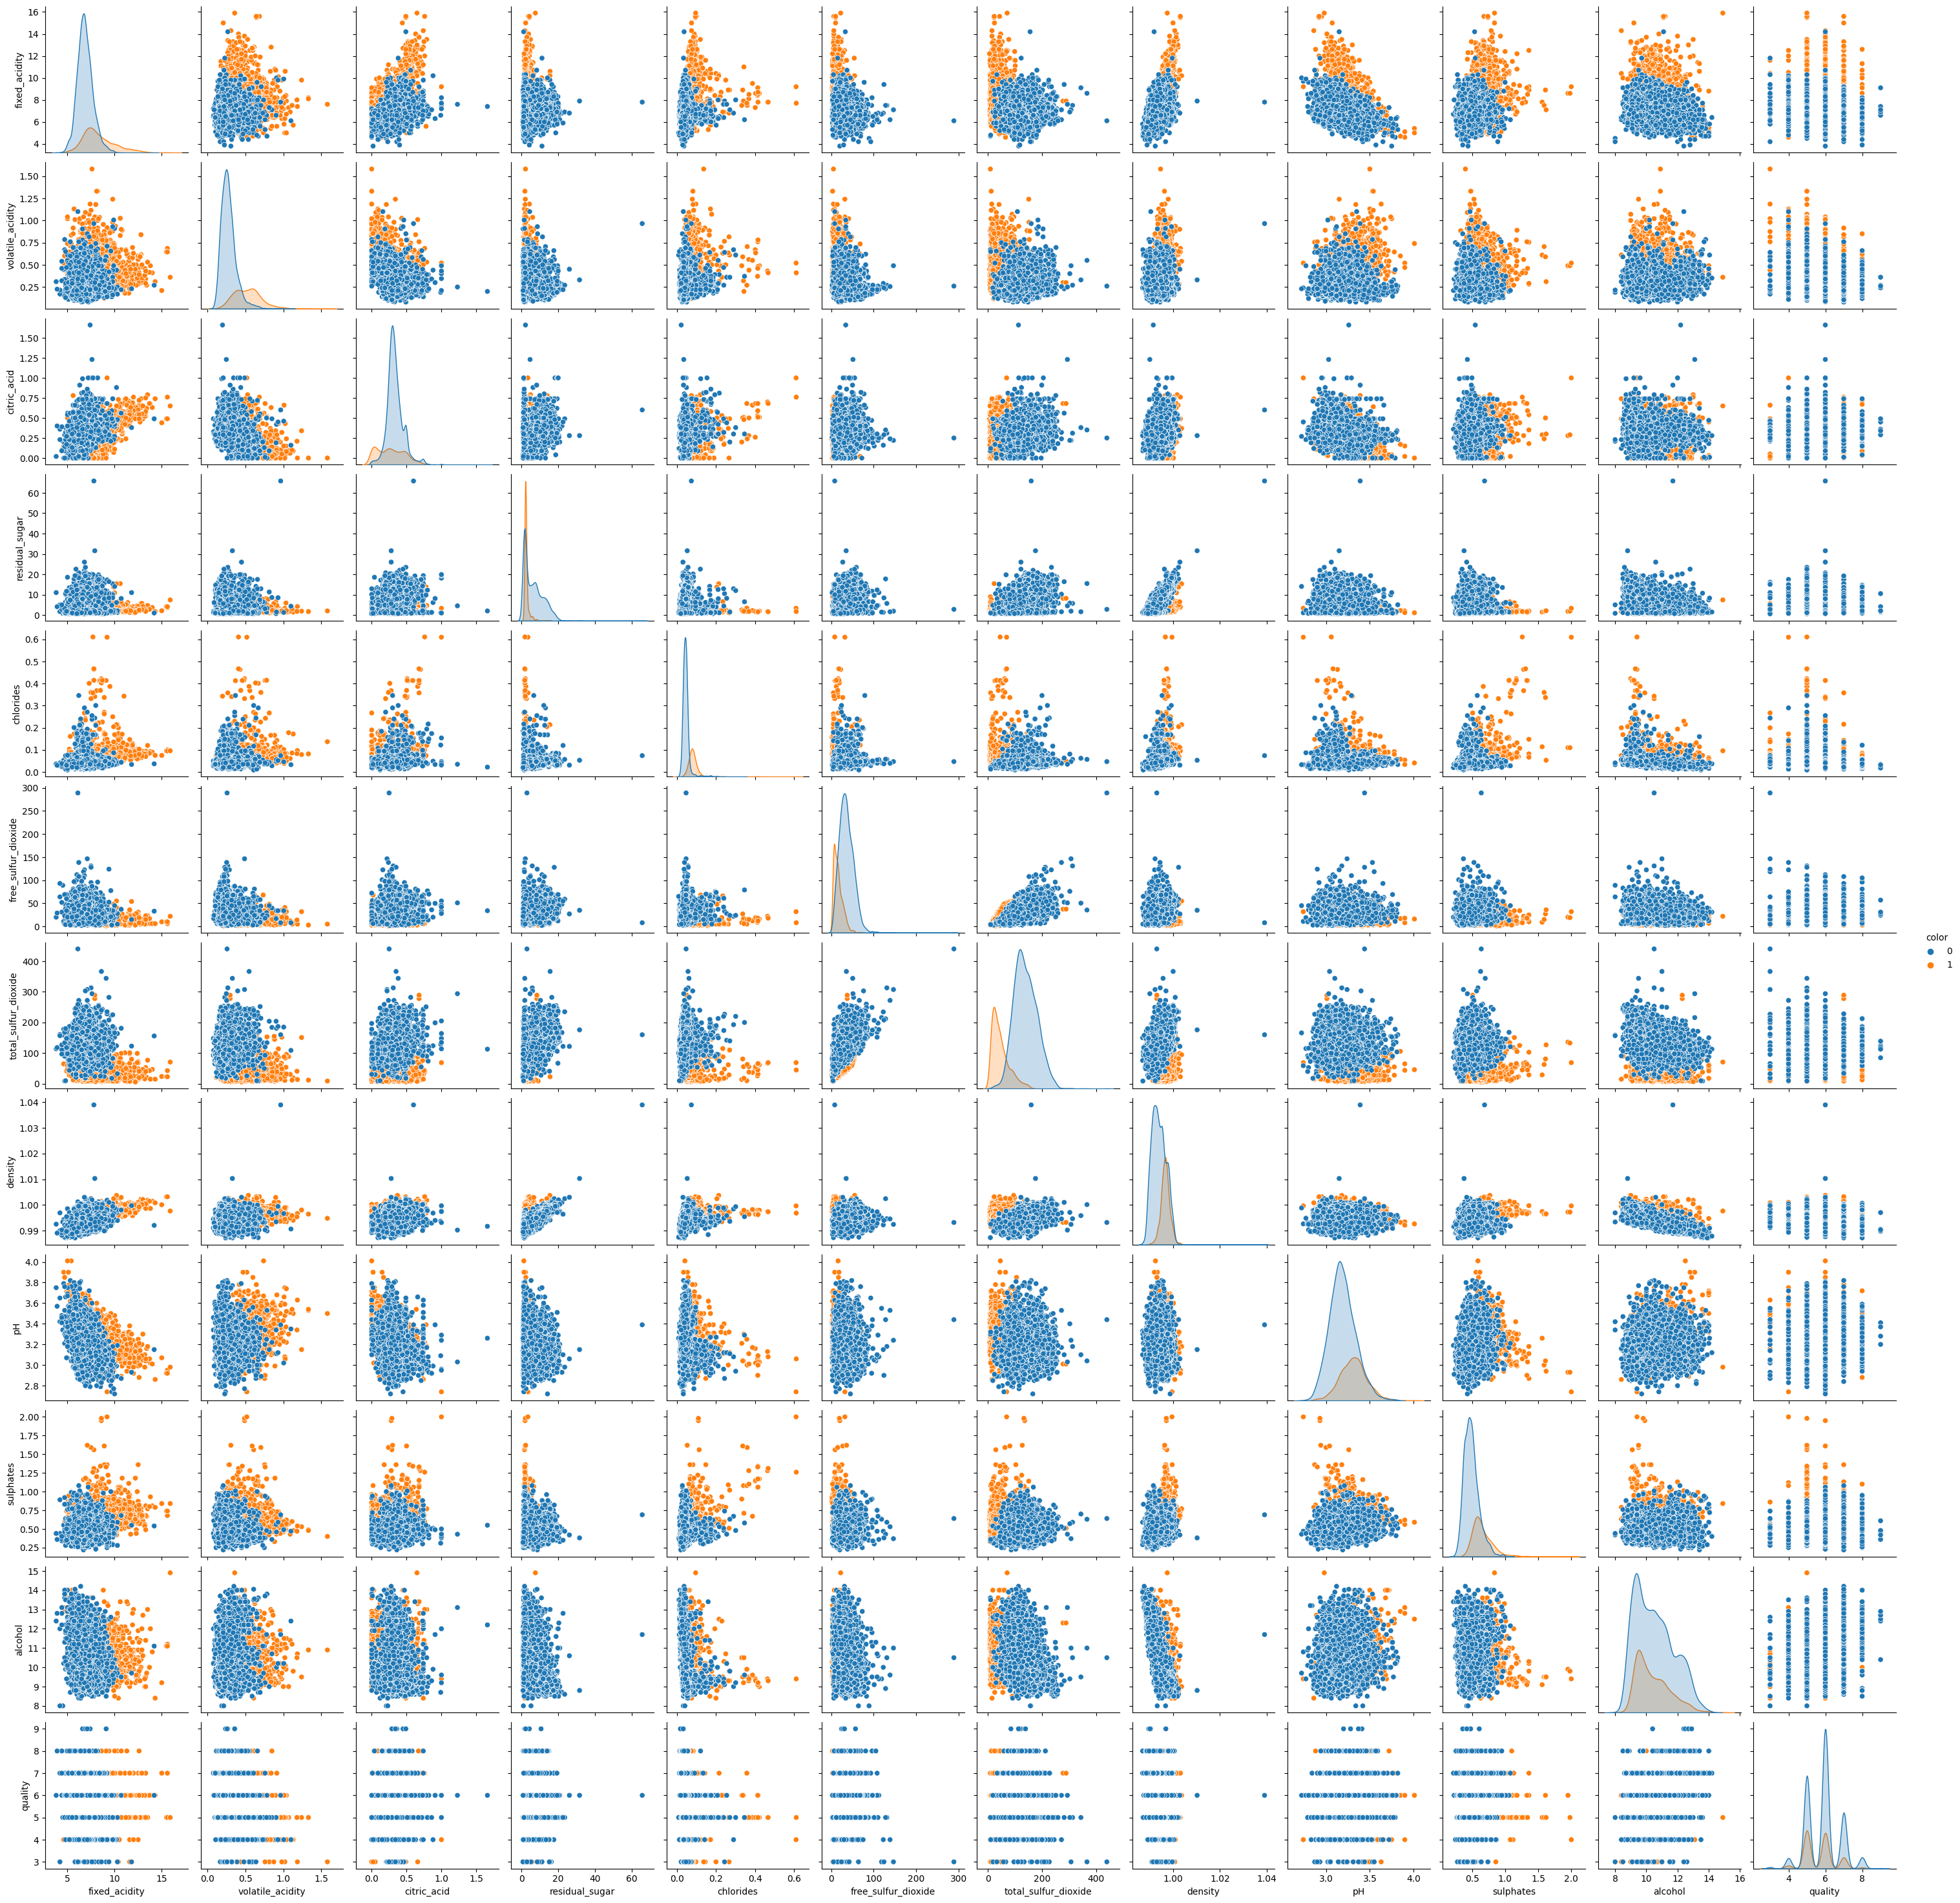

In [8]:
sns.pairplot(data, hue="color")
plt.show()

In [9]:
X = data.drop("color", axis="columns")
y = data["color"]

In [10]:
from scipy.stats import pearsonr

corr_scores = []

for col in X.columns:
  corr, _ = pearsonr(X[col], y)
  corr_scores.append(abs(corr))

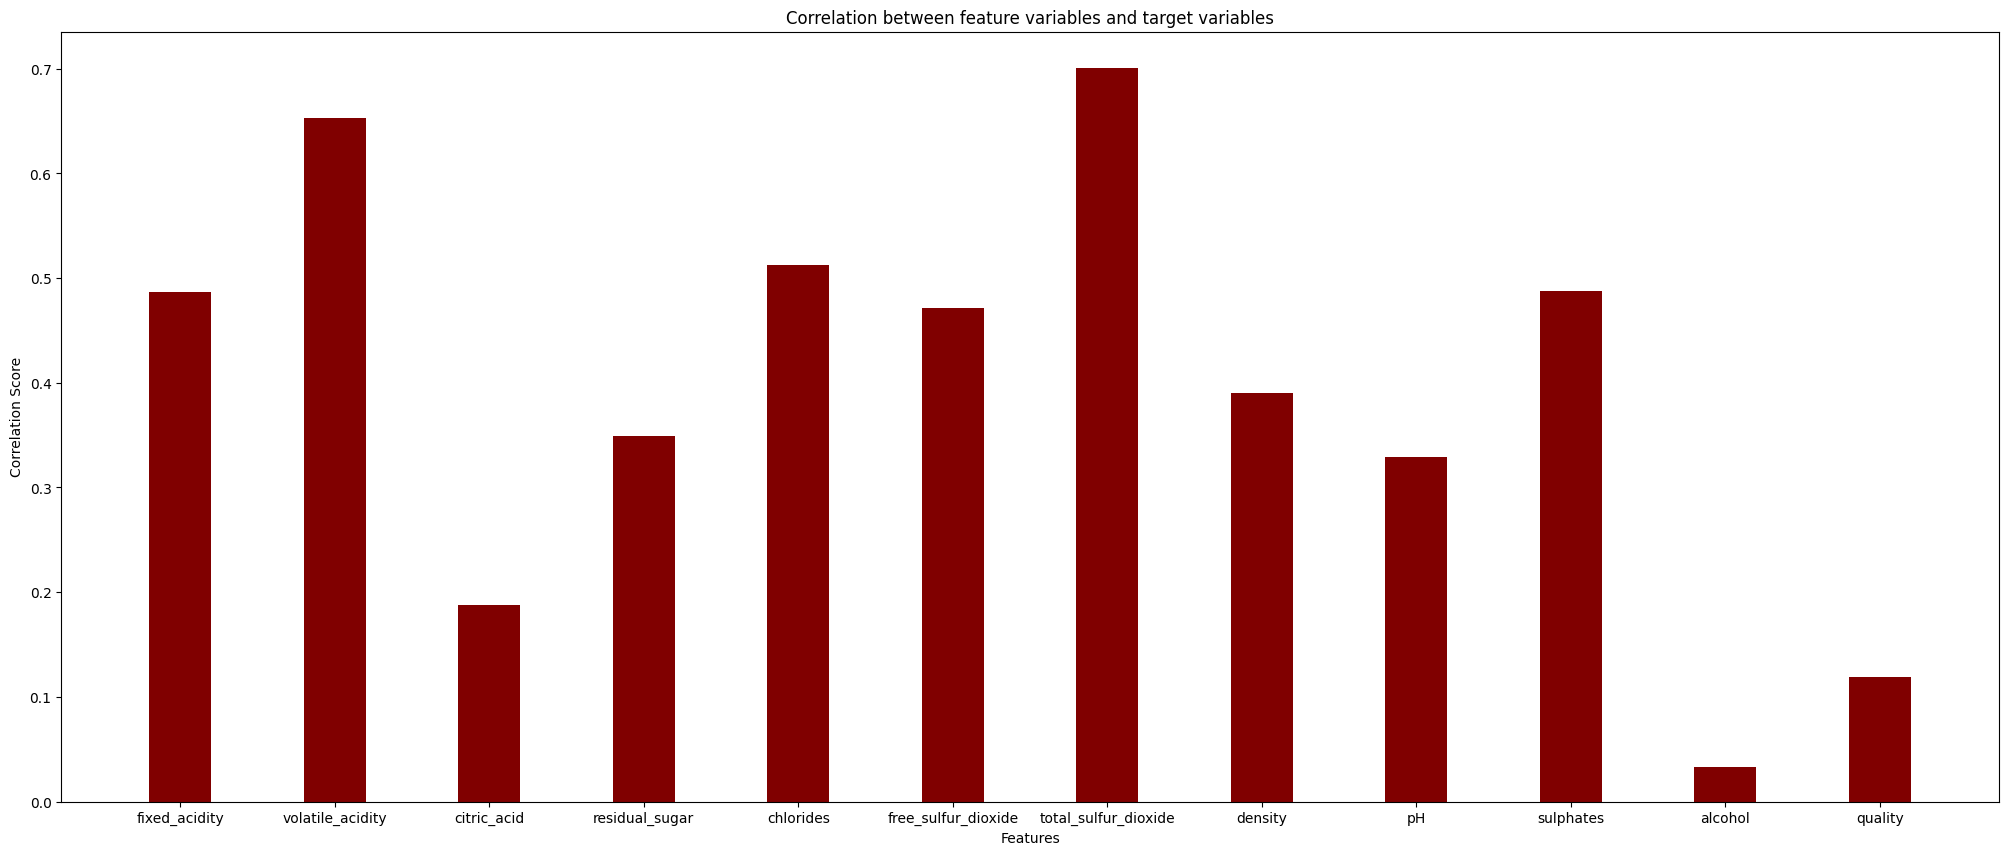

In [11]:
fig = plt.figure(figsize = (25, 10))

# creating the bar plot
plt.bar(X.columns, corr_scores, color ='maroon',
        width = 0.4)

plt.xlabel("Features")
plt.ylabel("Correlation Score")
plt.title("Correlation between feature variables and target variables")
plt.show()

The most correlated fields are *total_sulfur_dioxide* and *volatile_acidity*





In [12]:
x = X[["total_sulfur_dioxide","volatile_acidity"]]

In [13]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()


x= minmax_scaler.fit_transform(x)

In [14]:
x = pd.DataFrame(x, columns = X[["total_sulfur_dioxide","volatile_acidity"]].columns)

In [15]:
x

total_sulfur_dioxide  volatile_acidity
0                 0.064516          0.413333
1                 0.140553          0.533333
2                 0.110599          0.453333
3                 0.124424          0.133333
4                 0.064516          0.413333
...                    ...               ...
6492              0.198157          0.086667
6493              0.373272          0.160000
6494              0.241935          0.106667
6495              0.239631          0.140000
6496              0.211982          0.086667

[6497 rows x 2 columns]

## Part 2: Linear Decision Boundary

Our goal is to look at the decision boundary of a LinearSVC classifier on this dataset. Check out [this example](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork820-2023-01-01#sphx-glr-auto-examples-svm-plot-iris-svc-py) in sklearn's documentation.

* Fit a Linear Support Vector Machine Classifier to `X`, `y`.
* Pick 300 samples from `X`. Get the corresponding `y` value. Store them in variables `X_color` and `y_color`. This is because original dataset is too large and it produces a crowded plot.
* Modify `y_color` so that it has the value "red" instead of 1 and 'yellow' instead of 0.
* Scatter plot X_color's columns. Use the keyword argument "color=y_color" to color code samples.
* Use the code snippet below to plot the decision surface in a color coded way.

```python
x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = *[YOUR MODEL]*.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=colors, alpha=.3)
```

With LinearSVC, it is easy to experiment with different parameter choices and see the decision boundary.


In [16]:



def svc_contour(x,y, model):
    model.fit(x.values, y)

    model.fit(x.values,y)

    X_color = x.sample(300)
    y_color = y.iloc[X_color.index]

    y_color = y_color.replace({0: 'yellow', 1: 'red'})

    # Generate grid points
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T

    # Make predictions on the grid
    y_grid_predictions = model.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    # Create a new figure and axes
    fig, ax = plt.subplots()
    # Scatter plot with color coding
    plt.scatter(X_color[X_color.columns[0]], X_color[X_color.columns[1]], c=y_color)


    # Create a contour plot with color coding
    contour = ax.contourf(xx, yy, y_grid_predictions, cmap='viridis', alpha=.3)

    # Add labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Contour Plot with Predictions')

    # Add a colorbar for reference
    cbar = plt.colorbar(contour)

    # Show the plot
    plt.show()

## Part 3: Gaussian Kernel

Let's now fit a Gaussian kernel SVC and see how the decision boundary changes.

* Consolidate the code snippets in Question 2 into one function which takes in an estimator, `X` and `y`, and produces the final plot with decision boundary. The steps are:
    <ol>
     <li> Fit model
     <li> Get sample 300 records from X and the corresponding y's
     <li> Create grid, predict, plot using ax.contourf
     <li> Add on the scatter plot
    </ol>
* After copying and pasting code, the finished function uses the input `estimator` and not the LinearSVC model.
* For the following values of `gamma`, create a Gaussian Kernel SVC and plot the decision boundary.  
`gammas = [.5, 1, 2, 10]`
* Holding `gamma` constant, we plot the decision boundary for various values of `C`:
`[.1, 1, 10]`


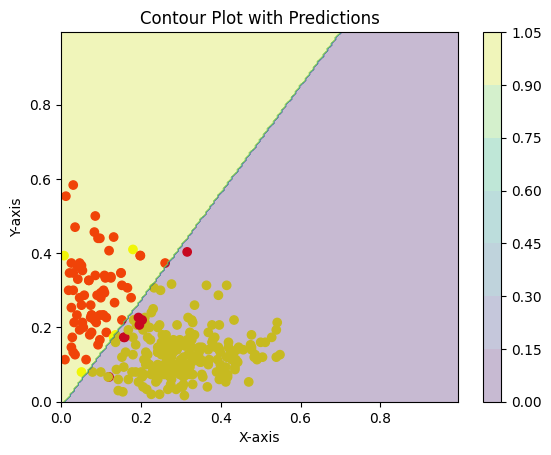

In [17]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

linear_svc = LinearSVC()



svc_contour(x,y, linear_svc)


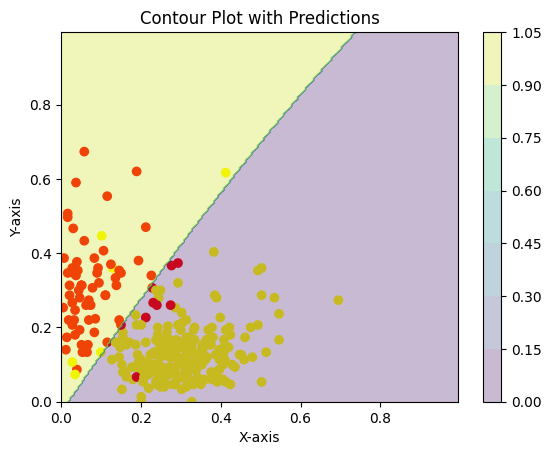

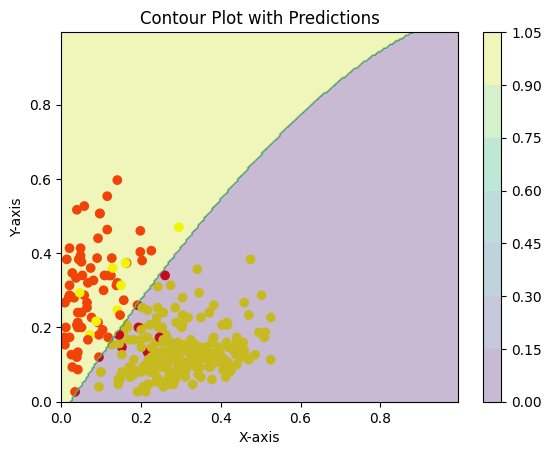

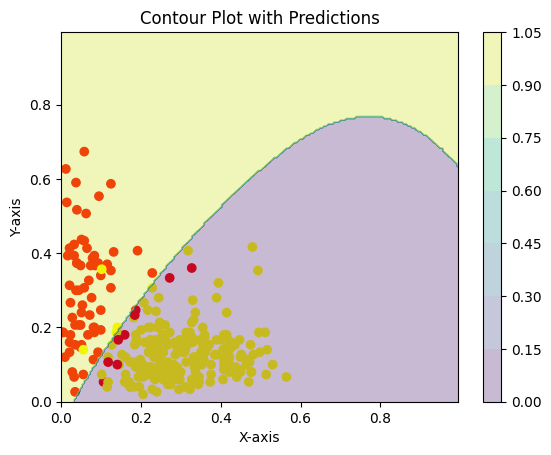

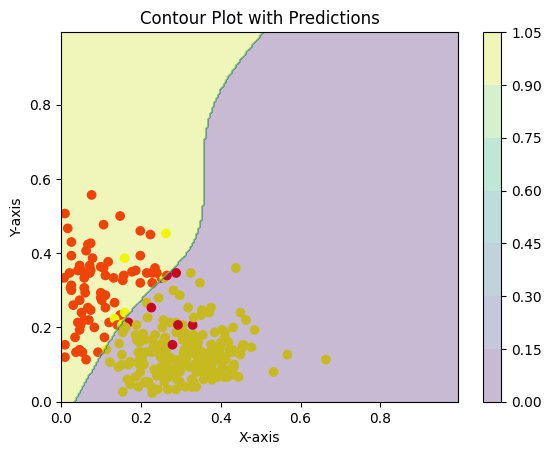

In [18]:
from sklearn.svm import SVC

gammas = [.5, 1, 2, 10]

for gamma in gammas:
  svc = SVC(gamma = gamma)
  svc_contour(x,y, svc)


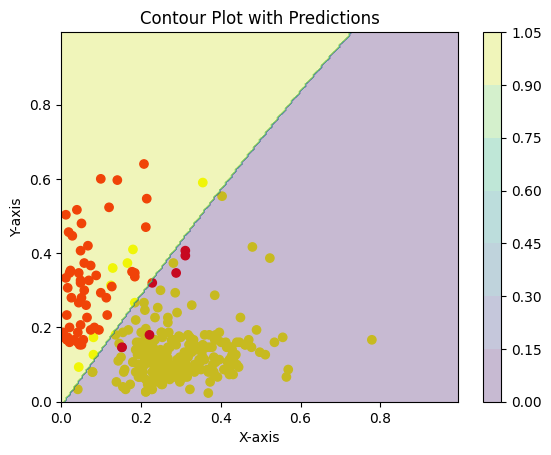

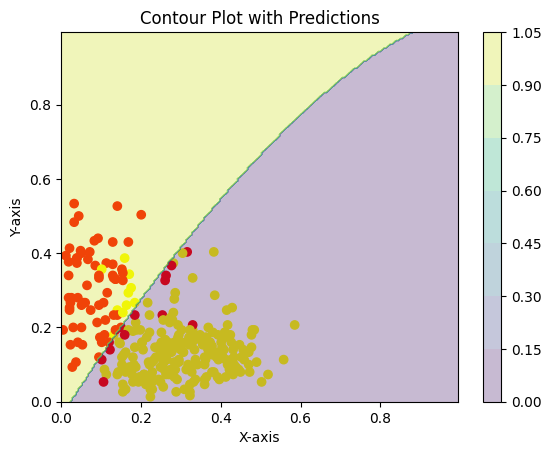

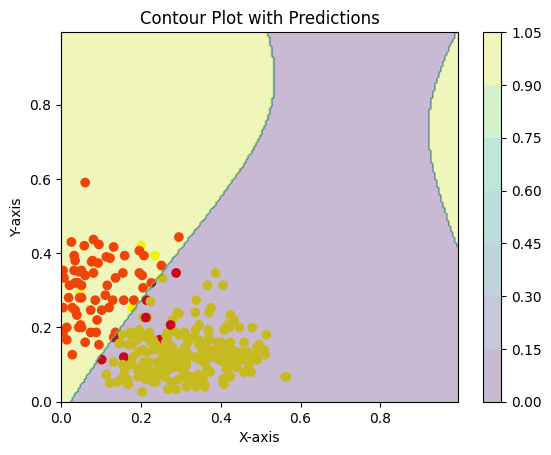

In [19]:


C= [.1, 1, 10]

for i in C:
  svc = SVC(gamma = 1, C=i)
  svc_contour(x,y, svc)